# Simulating a Silicon Photonic Mach-Zehnder Interferometer
MIT 6.S976: Silicon Photonics HW5. Written by Shoumik Chowdhury (@shoumikdc)

In [30]:
""" Import Relevant Packages """
import numpy as np
import matplotlib.pyplot as plt

""" Useful Constants"""
π = np.pi; nm = 1; μm = 1000; # base unit is nm here

## 1. Imbalanced MZI
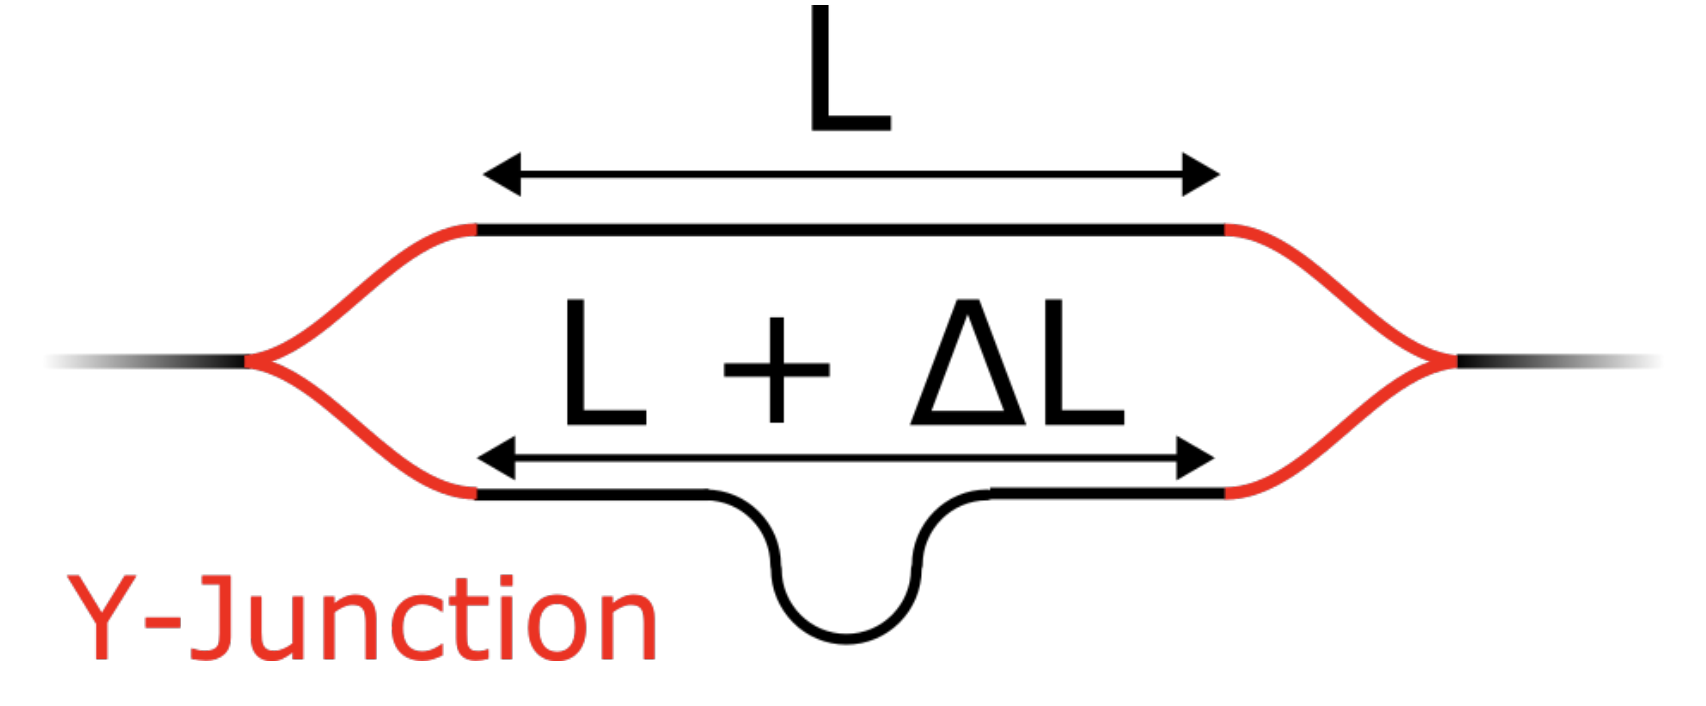

For an input field $E_{\rm in}$, we have 
\begin{equation*}
    E_{\rm out} = \frac{E_{\rm in} e^{i\beta L}}{2} \Big[1 + e^{i\beta \Delta L}\Big]
\end{equation*}
and thus the intensity $I_{\rm out} = |E_{\rm in}|^2 \cos^2(\beta \Delta L / 2)$. Here $\beta = 2\pi n_{\rm eff} / \lambda_0$ is the propagation constant. Setting $I_{\rm in} = |E_{\rm in}|^2$, we can compute the transmission spectrum $T = I_{\rm out} / I_{\rm in} = \cos^2(\beta \Delta L / 2) = \big[1 + \cos(\beta \Delta L)\big]/2$. 

In [65]:
""" Set wavelength range """
λ_min = 1480*nm; λ_max = 1640*nm; λ_range = np.linspace(λ_min, λ_max, 1001)

""" Set up parameters """
λ0 = 1550*nm # Device wavelength λ₀
n_eff = 2.4 # Effective index at λ₀
n_g = 4.2 # Group index at λ₀
L = 100*μm # MZI Waveguide Length
ΔL = 20*μm # MZI Wavelength Asymmetry

It turns out the effective index depends on wavelength. We can perform a first-order Taylor expansion $n_{\rm eff}(\lambda) = n_{\rm eff}(\lambda_0) + \frac{dn_{\rm eff}}{d\lambda}\big[\lambda-\lambda_0\big]$. In order to solve for the group velocity, we use $n_g = n_{\rm eff} - \frac{dn_{\rm eff}}{d\lambda}\lambda_0$ where $n_g, n_{\rm eff}$ are taken at $\lambda_0$. We then calculate $\beta(\lambda) = 2\pi n_{\rm eff}(\lambda) / \lambda$ for each wavelength $\lambda$.

Text(0.5, 1.0, 'Transmission: Log Scale')

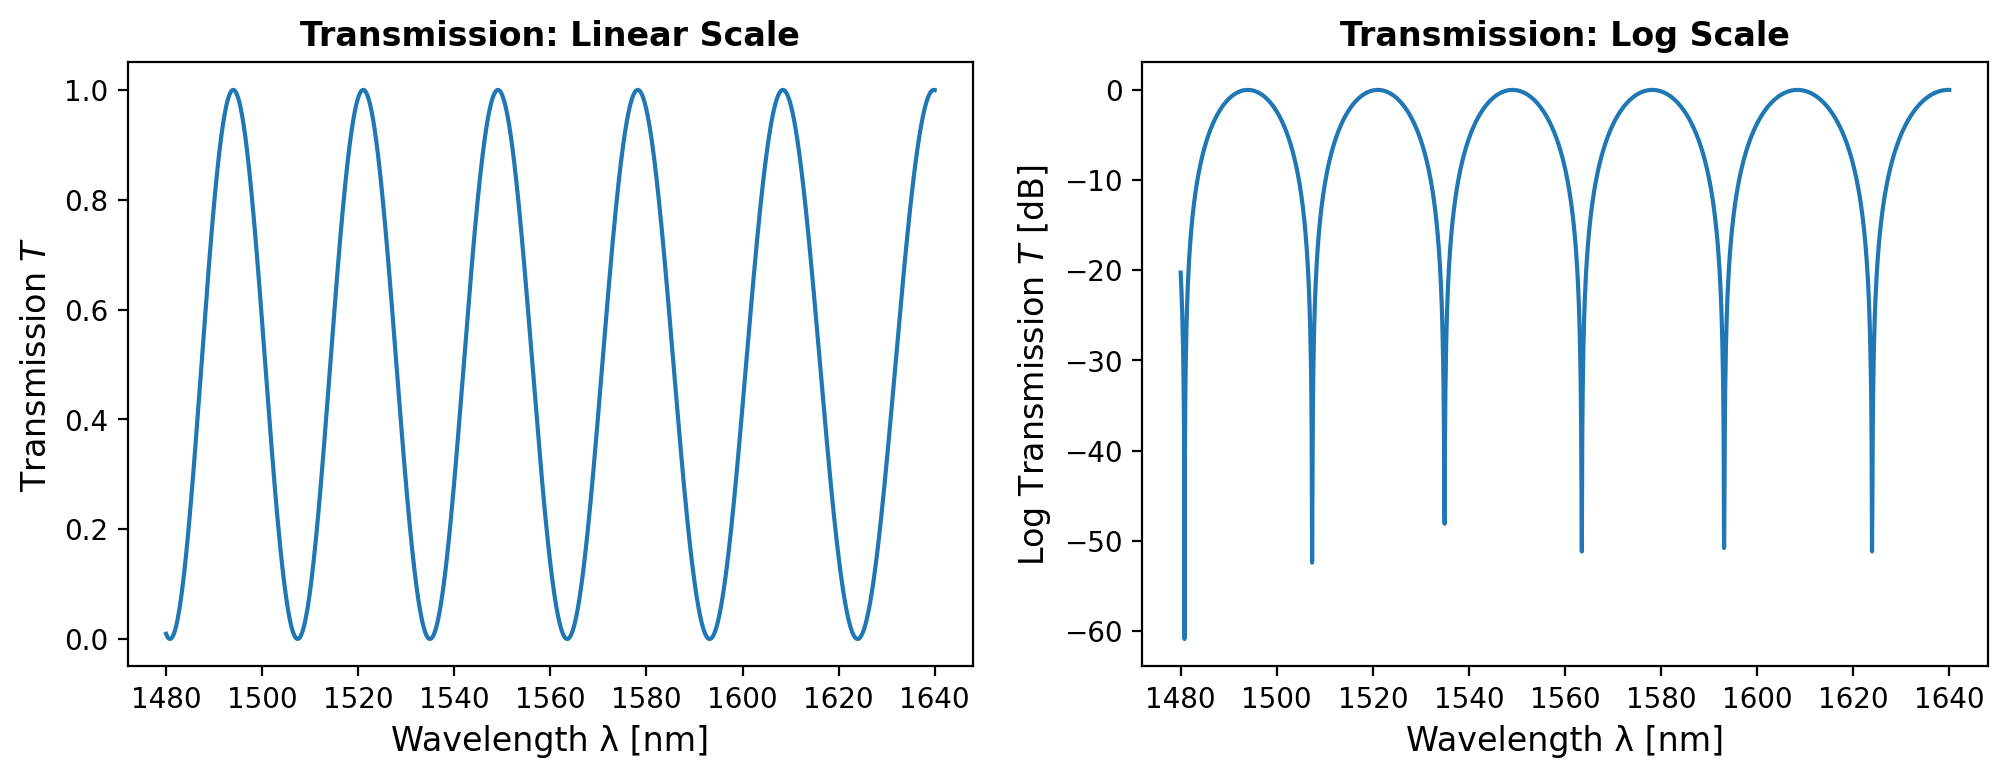

In [252]:
""" Propagation Constant """
slope = (n_eff - n_g) / λ0
n_eff_range = n_eff + slope * (λ_range - λ0)
β_range = 2 * π * n_eff_range / λ_range

""" Calculate Spectrum and Plot"""
T_linear = (1 + np.cos(β_range * ΔL)) / 2
T_log = 10*np.log10(T_linear)


fig, axs = plt.subplots(1, 2, dpi=200, figsize=(12, 4))

axs[0].plot(λ_range, T_linear)
axs[1].plot(λ_range, T_log)

axs[0].set_xlabel("Wavelength λ [nm]", fontsize=12);
axs[1].set_xlabel("Wavelength λ [nm]", fontsize=12);
axs[0].set_ylabel(r"Transmission $T$", fontsize=12);
axs[1].set_ylabel(r"Log Transmission $T$ [dB]", fontsize=12);
axs[0].set_title("Transmission: Linear Scale", fontweight="bold")
axs[1].set_title("Transmission: Log Scale", fontweight="bold")

## 2. Adding Losses to Improve Extinction Ratio

In [267]:
""" Set wavelength range """
λ_min = 1480*nm; λ_max = 1640*nm; λ_range = np.linspace(λ_min, λ_max, 2001)

""" Set up parameters """
λ0 = 1550*nm # Device wavelength λ₀
n_eff = 2.4 # Effective index at λ₀
n_g = 4.2 # Group index at λ₀
L = 100*μm # MZI Waveguide Length
ΔL = 20*μm # MZI Wavelength Asymmetry
α = 5e-6

Text(0.5, 1.0, 'Transmission with Loss: Log Scale')

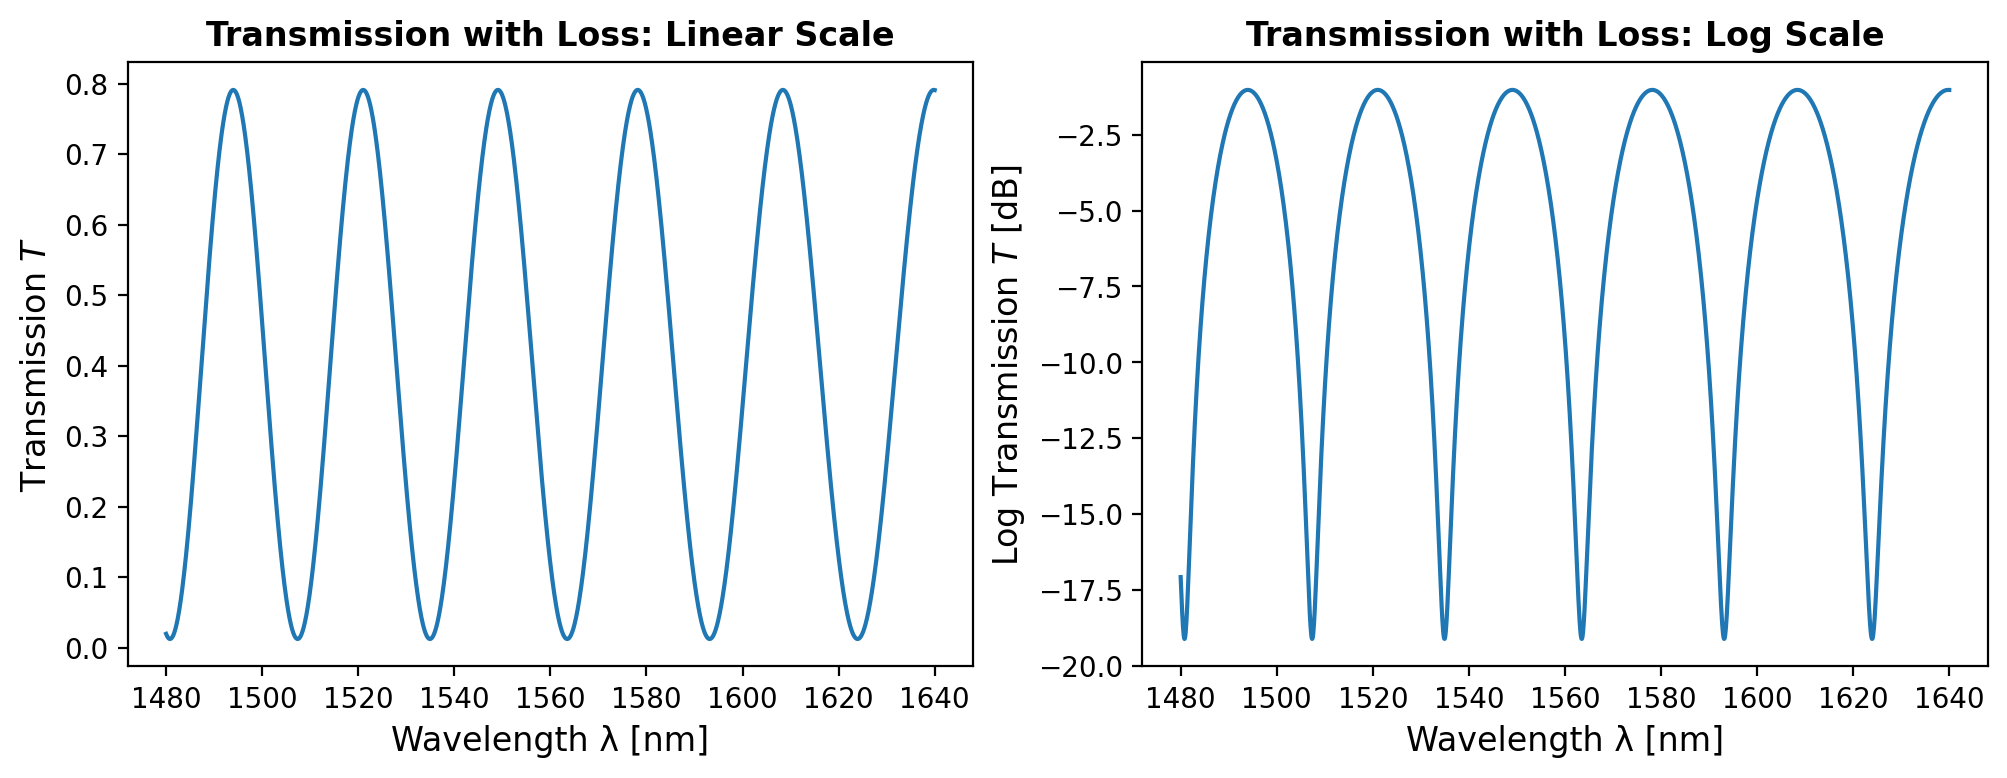

In [269]:
""" Propagation Constant """
slope = (n_eff - n_g) / λ0
n_eff_range = n_eff + slope * (λ_range - λ0)
β_range = 2 * π * n_eff_range / λ_range


""" Set up Normalized Electric Fields """
E1 = np.exp(-α * L / 2) * np.exp(1j * β_range * L) / np.sqrt(2)
E2 = np.exp(1j * β_range * (L + ΔL)) / np.sqrt(2)


E_out = (E1 + E2) / np.sqrt(2)

T_linear = np.abs(E_out)**2
T_log = 10*np.log10(T_linear)


fig, axs = plt.subplots(1, 2, dpi=200, figsize=(12, 4))

axs[0].plot(λ_range, T_linear)
axs[1].plot(λ_range, T_log)

axs[0].set_xlabel("Wavelength λ [nm]", fontsize=12);
axs[1].set_xlabel("Wavelength λ [nm]", fontsize=12);
axs[0].set_ylabel(r"Transmission $T$", fontsize=12);
axs[1].set_ylabel(r"Log Transmission $T$ [dB]", fontsize=12);
axs[0].set_title("Transmission with Loss: Linear Scale", fontweight="bold")
axs[1].set_title("Transmission with Loss: Log Scale", fontweight="bold")

## 3. MZI + Directional Coupler
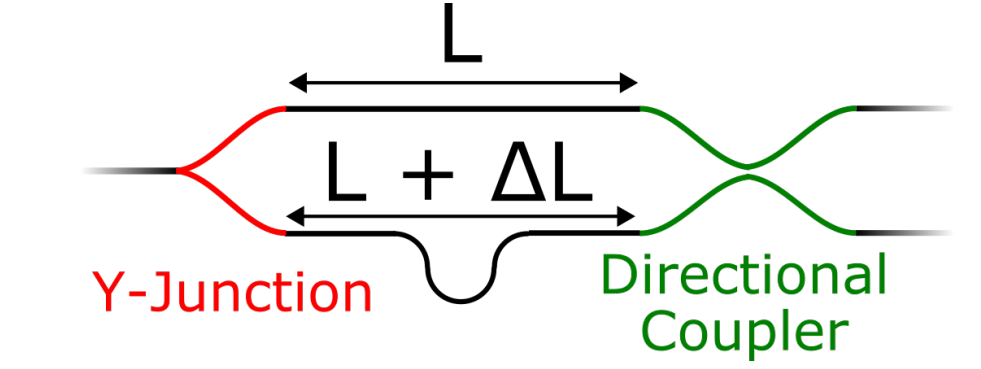

For a coupling ratio 50:50, set `T = 0.5` below. For a coupling ratio 60:40, use `T = 0.6`.

In [283]:
""" Set wavelength range """
λ_min = 1480*nm; λ_max = 1640*nm; λ_range = np.linspace(λ_min, λ_max, 2001)

""" Set up parameters """
λ0 = 1550*nm # Device wavelength λ₀
n_eff = 2.4 # Effective index at λ₀
n_g = 4.2 # Group index at λ₀
L = 100*μm # MZI Waveguide Length
ΔL = 20*μm # MZI Wavelength Asymmetry

""" Directional Coupler """
T = 0.6; t = np.sqrt(T); κ = np.sqrt(1 - T)

Text(0.5, 1.0, 'Transmission: Log Scale')

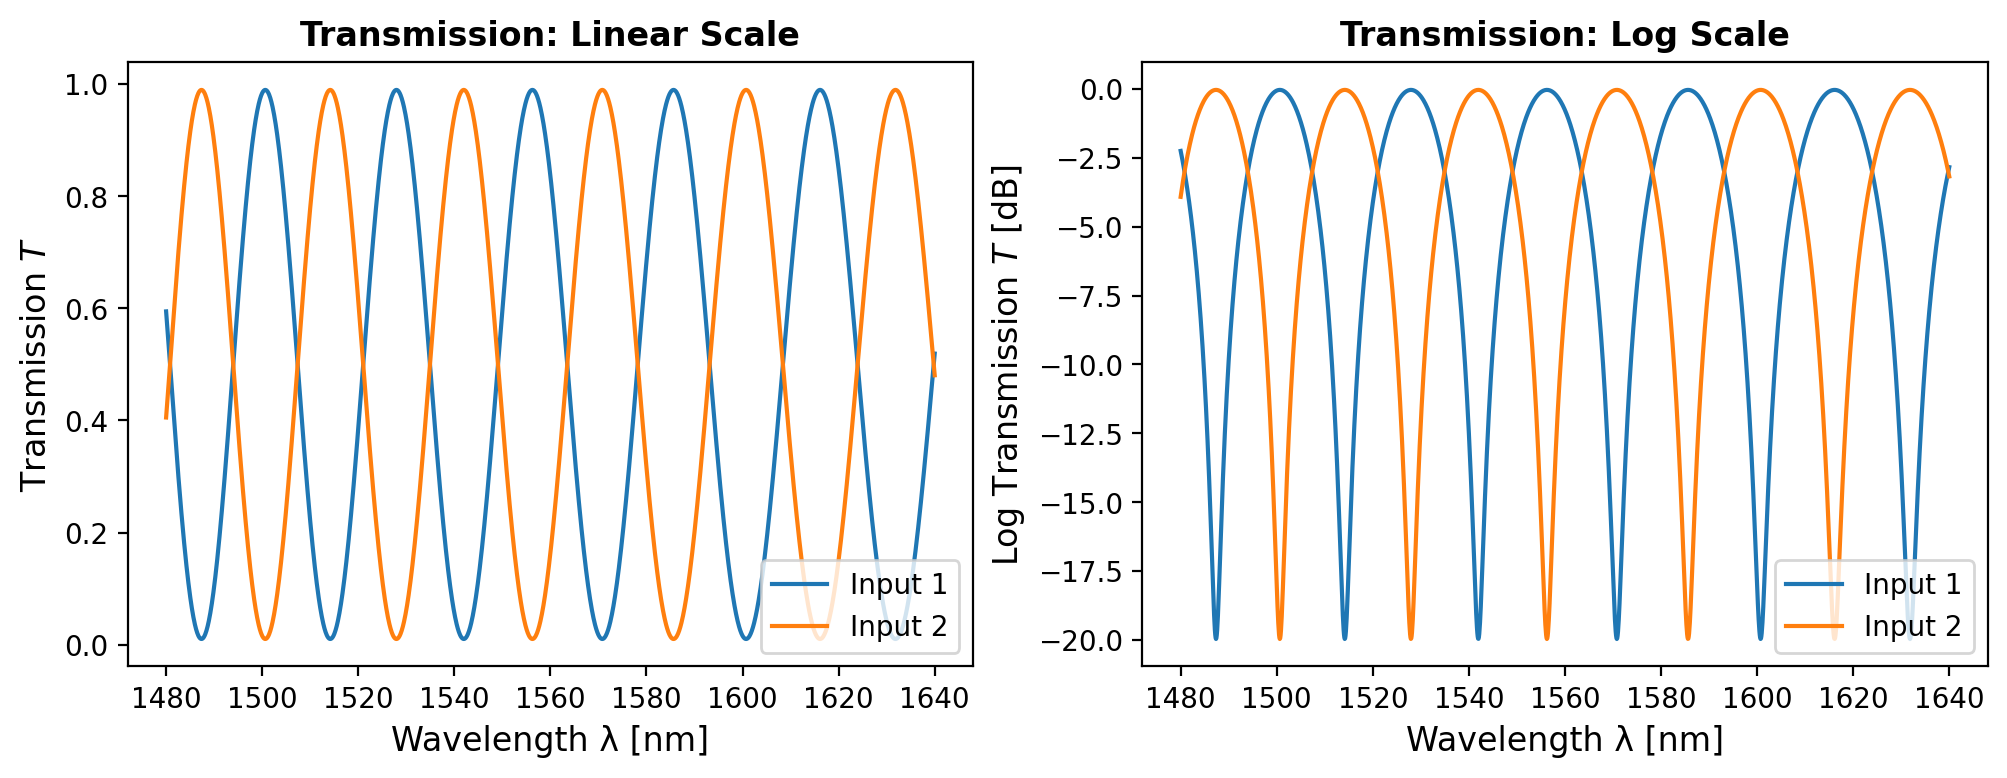

In [284]:
""" Propagation Constant """
slope = (n_eff - n_g) / λ0
n_eff_range = n_eff + slope * (λ_range - λ0)
β_range = 2 * π * n_eff_range / λ_range


""" Set up Normalized Electric Fields """

# E-Field Amplitudes before Directional Coupler
E1_mid = np.exp(1j * β_range * L) / np.sqrt(2)
E2_mid = np.exp(1j * β_range * (L + ΔL)) / np.sqrt(2)


# E-Field Amplitudes after Directional Coupler
E1_out = t * E1_mid + 1j * κ * E2_mid
E2_out = t * E2_mid + 1j * κ * E1_mid


""" Calculate Transmission Spectrum [dB] and Plot"""
T1_out = np.abs(E1_out)**2
T2_out = np.abs(E2_out)**2


T1_out_log = 10*np.log10(T1_out)
T2_out_log = 10*np.log10(T2_out)



""" Calculate Spectrum and Plot"""
fig, axs = plt.subplots(1, 2, dpi=200, figsize=(12, 4))

axs[0].plot(λ_range, T1_out, label="Input 1")
axs[0].plot(λ_range, T2_out, label="Input 2")
axs[1].plot(λ_range, T1_out_log, label="Input 1")
axs[1].plot(λ_range, T2_out_log, label="Input 2")

axs[0].legend(loc='lower right')
axs[1].legend(loc='lower right')

axs[0].set_xlabel("Wavelength λ [nm]", fontsize=12);
axs[1].set_xlabel("Wavelength λ [nm]", fontsize=12);
axs[0].set_ylabel(r"Transmission $T$", fontsize=12);
axs[1].set_ylabel(r"Log Transmission $T$ [dB]", fontsize=12);
axs[0].set_title("Transmission: Linear Scale", fontweight="bold")
axs[1].set_title("Transmission: Log Scale", fontweight="bold")

## 4. MZI as a Spectral Filter

In [247]:
""" Set up devices"""
def MZI(E_in, params):
    
    
    λ0, n_eff, n_g, L, ΔL = params["λ0"], params["n_eff"], params["n_g"], params["L"], params["ΔL"]
    
    """ Propagation Constant """
    slope = (n_eff - n_g) / λ0
    n_eff_range = n_eff + slope * (λ_range - λ0)
    β_range = 2 * π * n_eff_range / λ_range
    
    
    E1 = E_in * np.exp(1j * β_range * L) / np.sqrt(2)
    E2 = E_in * np.exp(1j * β_range * (L + ΔL)) / np.sqrt(2)
    
    return E1_mid, E2_mid
    
def Ycombiner(E1, E2):
    return (E1_mid + E2_mid) / np.sqrt(2)

def DC(E1, E2, T = 0.5):
    
    t = np.sqrt(T); κ = np.sqrt(1-T)
    
    E1_out = t * E1 + 1j * κ * E2
    E2_out = t * E2 + 1j * κ * E1
    
    return E1_out, E2_out


def db(T, tol=1e-3, lo=1e-3):
    
    Tdb = []
    for t in T:
        if t < tol:
            Tdb.append(20*np.log10(lo))
        else:
            Tdb.append(20*np.log10(t))
    
    return np.array(Tdb)

In [248]:
""" Calculate ΔLs needed for filtering """
ΔL2 = λ0**2 / (40*nm * n_g) # Separate [1510, 1550] and [1530, 1570]
ΔL1 = λ0**2 / (80*nm * n_g) # Separate 1510 and 1550; also separate 1530 and 1570

In [251]:
ΔL1 / μm

7.1502976190476195

In [244]:
params2 = {"λ0": 1550*nm, "n_eff": 2.4, "n_g": 4.2, "L": 60*μm, "ΔL": 14.045*μm}
params1 = {"λ0": 1550*nm, "n_eff": 2.4, "n_g": 4.2, "L": 60*μm, "ΔL": ΔL1}


""" Set wavelength range """
λ_min = 1480*nm; λ_max = 1640*nm; λ_range = np.linspace(λ_min, λ_max, 2001)

In [245]:
out1 = DC(*MZI(1, params2))[0]
out2 = DC(*MZI(1, params2))[1]

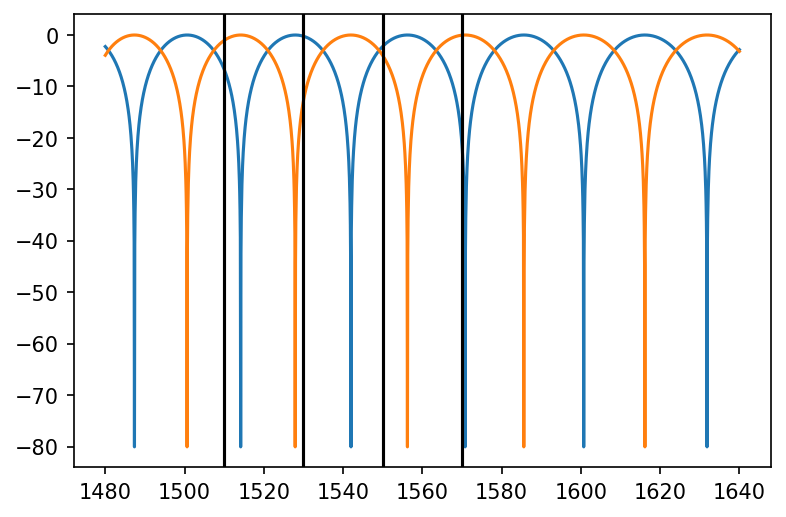

In [246]:
plt.figure(dpi=150)
plt.plot(λ_range, db(np.abs(out1), tol=5e-3, lo=1e-4))
plt.plot(λ_range, db(np.abs(out2), tol=5e-3, lo=1e-4))

plt.axvline(1510, c="black")
plt.axvline(1530, c="black")
plt.axvline(1550, c="black")
plt.axvline(1570, c="black")

([<matplotlib.axis.XTick at 0x16679f760>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

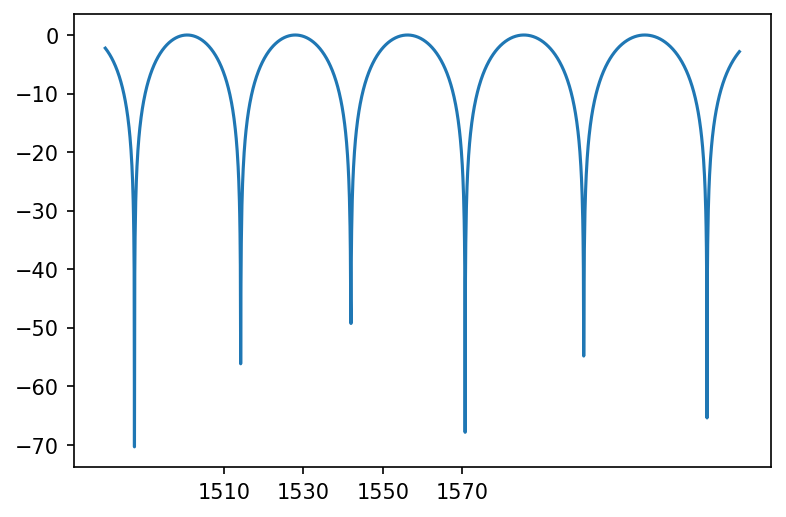

In [148]:
plt.figure(dpi=150)
plt.plot(λ_range, 20*np.log10(np.abs(out1)))
#plt.plot(λ_range, 20*np.log10(np.abs(out2)))
plt.xticks([1510, 1530, 1550, 1570])

In [118]:
np.log10(np.abs(out1)

array([0.77241282, 0.76625595, 0.76002859, ..., 0.70998155, 0.71548806,
       0.72094995])